# LeNet-5(Keras)


In [16]:
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Conv2D,AveragePooling2D,Dense,Activation,ZeroPadding2D,Flatten


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load Dataset

这里使用Keras数据集中的Minist数据集,train set 60K,test set 10K.

这里将样本拆分为: train set 60K,validation set 7K, test set 3K.同时将样本reshape为$(28,28,1)$.

In [14]:
def loadDataset(index,split_rate):
    """
    Load data set.
    
    Arguments:
    ---------
        index: show index images.
        split_rate: validation set and test set split rate.
    
    Returns:
    -------
        x_train: training set shape is (m,n_c,n_h,n_w)
        y_train: training labels shape is (m,)
        x_val: validation set shape is (m,n_c,n_h,n_w)
        y_val: validation labels shape is (m,)
        x_test: testing set shape is (m,n_c,n_h,n_w)
        y_test: testing labels shape is (m,)
    """
    (x_train,y_train),(X,Y) = mnist.load_data()
    n_classes = 10
    
    plt.imshow(x_train[index],cmap='gray')
    plt.show()
    
    x_train,X = x_train / 255,X/255
    x_val, x_test, y_val, y_test = train_test_split(X, Y, test_size=split_rate)
    
    x_train = x_train.reshape((-1,28,28,1))
    x_val = x_val.reshape((-1,28,28,1))
    x_test = x_test.reshape((-1,28,28,1))
    
    y_train = keras.utils.to_categorical(y_train,num_classes=n_classes)
    y_val = keras.utils.to_categorical(y_val,num_classes=n_classes)
    y_test = keras.utils.to_categorical(y_test,num_classes=n_classes)
    
    print('Training Set shape is:\n',x_train.shape)
    print('Training Labels shape is:\n',y_train.shape)
    print('Validation Set shape is:\n',x_val.shape)
    print('Validation Labels shape is:\n',y_val.shape)
    print('Testing Set shape is:\n',x_test.shape)
    print('Testing Labels shape is:\n',y_test.shape)
    
    return x_train,y_train,x_val,y_val,x_test,y_test

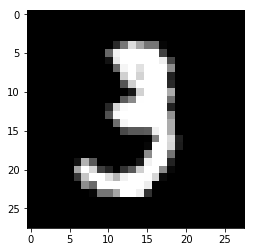

Training Set shape is:
 (60000, 28, 28, 1)
Training Labels shape is:
 (60000, 10)
Validation Set shape is:
 (7000, 28, 28, 1)
Validation Labels shape is:
 (7000, 10)
Testing Set shape is:
 (3000, 28, 28, 1)
Testing Labels shape is:
 (3000, 10)


In [15]:
x_train,y_train,x_val,y_val,x_test,y_test = loadDataset(10,0.3)

## Keras of LeNet-5

下面开始使用Keras构造LeNet-5

网络构成为:

INPUT(batch,32,32,1)-->CONV1(batch,28,28,6)-->Relu1-->Average Pool1(batch,14,14,6)-->CONV2(batch,10,10,16)-->ReLu2-->Average Pool2(5,5,16)-->FC3(batch,120)-->FC4(batch,84)-->FC5(batch,10).

In [19]:
def LeNet_5Model(data,labels,val_data,val_labels,test_data,test_labels,epochs,lr,BATCH_SIZE):
    """
    Implemention LeNet-5 Module.
    
    Arguments:
    ---------
        data: training data set, the shape is (m,n_h,n_w,n_c).
        labels: training labels, the shape is (m,n_classes).
        val_data: validation data set, the shape is (m,n_h,n_w,n_c).
        val_labels: validation labels, the shape is (m,n_classes).
        test_data: testing data set, the shape is (m,n_h,n_w,n_c).
        test_labels: tesing labels, the shape is (m,n_classes).
        epochs: number of iterate. 
        lr: learning rate to use in RMSProp optimizer.
        BATCH_SIZE: epoch size.
    
    """
    # create Sequential model
    model = Sequential()
    
    # CNN layers
    model.add(ZeroPadding2D(padding=((2,2),(2,2))))
    model.add(Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),input_shape=data.shape[1:]))
    model.add(Activation('relu'))
    model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=16,kernel_size=(5,5),strides=(1,1)))
    model.add(Activation('relu'))
    model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=120,activation='relu'))
    model.add(Dense(units=84,activation='relu'))
    model.add(Dense(units=10,activation='softmax'))
    # end of CNN layers
    
    # choose categorical crossentropy loss
    loss = keras.losses.categorical_crossentropy
    # choose RMSprop optimizer
    optimizer = keras.optimizers.RMSprop(lr=lr)
    # compile model
    model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
    # Starting Fitting
    model.fit(data,labels,BATCH_SIZE,epochs,validation_data=(val_data,val_labels),shuffle=True)
    
    # Start Testing
    loss,Accuracy = model.evaluate(test_data,test_labels,batch_size=BATCH_SIZE)
    
    print('\033[0;35m The Testing Set Loss:{:.4f} Accuracy:{:.4f}\033[0m'.format(loss,Accuracy))
    
    return model
    

In [20]:
model = LeNet_5Model(x_train,y_train,x_val,y_val,x_test,y_test,epochs=10,lr=1e-4,BATCH_SIZE=100)

Train on 60000 samples, validate on 7000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 363us/step - loss: 1.0981 - acc: 0.7266 - val_loss: 0.4052 - val_acc: 0.8857
Epoch 2/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.3536 - acc: 0.8973 - val_loss: 0.2754 - val_acc: 0.9179
Epoch 3/10
60000/60000 [==============================] - 27s 455us/step - loss: 0.2640 - acc: 0.9219 - val_loss: 0.2127 - val_acc: 0.9373
Epoch 4/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.2082 - acc: 0.9384 - val_loss: 0.1730 - val_acc: 0.9477
Epoch 5/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.1703 - acc: 0.9505 - val_loss: 0.1395 - val_acc: 0.9591
Epoch 6/10
60000/60000 [==============================] - 24s 403us/step - loss: 0.1434 - acc: 0.9582 - val_loss: 0.1248 - val_acc: 0.9634
Epoch 7/10
60000/60000 [==============================] - 23s 389us/step - loss: 0.1251 - acc: 0.9632 - val_loss: 0.1